In [1]:
from Models.Inception_V4.model import Inception_V4
from Models.InceptionResNet_V2.model import InceptionResNet_V2
from tensorflow.keras.utils import plot_model

In [2]:
from tensorflow.keras.preprocessing import image
import os
import pickle

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as cv

### Dataset used in this notebook:
http://users.cecs.anu.edu.au/~hrezatofighi/Data/Leukocyte%20Data.htm

Each image in dataset was hand-cropped 5 times as an extra augmentation (using self-written py script)

Also some common augmentation techniques were used to train models:
- Random Zoom
- Brightness Shift
- Random Rotation
- Random Flipping

# 1) Data Examples

Basophil Example:


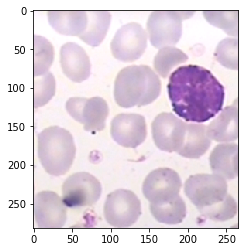

In [4]:
arr = cv.imread("SelfCutData/SelfCutData/Basophil/basophil_10_augment_n_1.png")
plt.imshow(arr)
print("Basophil Example:")
plt.show()

Eosinophil Example:


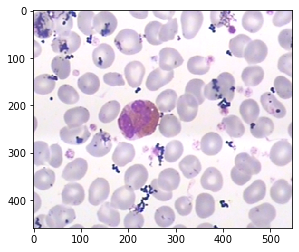

In [5]:
arr = cv.imread("SelfCutData/SelfCutData/Eosinophil/eosinophil_10_augment_n_1.png")
plt.imshow(arr)
print("Eosinophil Example:")
plt.show()

Lymphocyte Example:


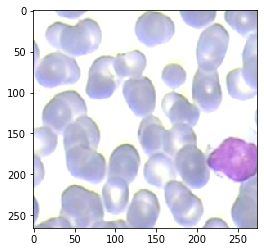

In [6]:
arr = cv.imread("SelfCutData/SelfCutData/Lymphocyte/lymphocyte_10_augment_n_3.png")
plt.imshow(arr)
print("Lymphocyte Example:")
plt.show()

Monocyte Example:


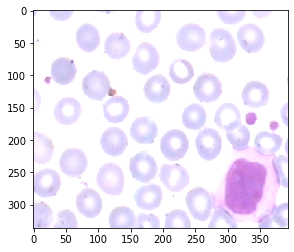

In [7]:
arr = cv.imread("SelfCutData/SelfCutData/Monocyte/monocyte_10_augment_n_1.png")
plt.imshow(arr)
print("Monocyte Example:")
plt.show()

Neutrophil Example:


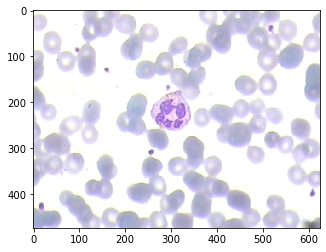

In [8]:
arr = cv.imread("SelfCutData/SelfCutData/Neutrophil/neutrophil_10_augment_n_1.png")
plt.imshow(arr)
print("Neutrophil Example:")
plt.show()

# 2) Loading Test Data

### On some point i've noticed that normalization type affects model performance a lot on this certain dataset, so each model will be trained using 3 different normalization types:
- Samplewise norm+std
- Featurewise norm+std
- Rescale by 1/255

### 2.1)Samplewise

In [8]:
gen1 = image.ImageDataGenerator(samplewise_center=1, samplewise_std_normalization=1)
test_hard1 = gen1.flow_from_directory("SelfCutData/Test", batch_size=20, target_size=(299, 299), shuffle=1)
test_simple1 = gen1.flow_from_directory("SelfCutData/TestMod", batch_size=20, target_size=(299, 299), shuffle=1)

Found 235 images belonging to 5 classes.
Found 127 images belonging to 5 classes.


### 2.2)Featurewise

In [9]:
gen2 = image.ImageDataGenerator(featurewise_center=1, featurewise_std_normalization=1)
test_hard2 = gen2.flow_from_directory("SelfCutData/Test", batch_size=20, target_size=(299, 299), shuffle=1)
test_simple2 = gen2.flow_from_directory("SelfCutData/TestMod", batch_size=20, target_size=(299, 299), shuffle=1)

Found 235 images belonging to 5 classes.
Found 127 images belonging to 5 classes.


### 2.3)Rescale by 1/255

In [10]:
gen3 = image.ImageDataGenerator(rescale=1./255.)
test_hard3 = gen3.flow_from_directory("SelfCutData/Test", batch_size=20, target_size=(299, 299), shuffle=1)
test_simple3 = gen3.flow_from_directory("SelfCutData/TestMod", batch_size=20, target_size=(299, 299), shuffle=1)

Found 235 images belonging to 5 classes.
Found 127 images belonging to 5 classes.


### test_hard & test_simple explained:

Hard test not always contains 100% of cell on image (could sometimes contain just half of cell)

At the same time, simple test has images, that contain almost 100% of cell captured

# 3) Testing InceptionV4

### 3.1) Loading & compiling network

In [12]:
nn1 = Inception_V4(size=(299, 299, 3), N_Classes=5)

In [13]:
nn1.compile(loss=["categorical_crossentropy"], optimizer="SGD", metrics=["accuracy"])

### 3.2) Loading weights trained for 150 epochs and evaluating

Model was trained 3 times(one for each normalization type) using SGD optim. with learning rate 0.03 which was multiplied by 0.95 after each 4 epochs

### Samplewise normed

In [14]:
nn1.load_weights("InceptionV4_jupyter/Weights/SGD/Inception_V4_samplewise_center_and_std_150epochs_BEST.h5")

In [19]:
res1 = nn1.evaluate_generator(test_simple1)
res2 = nn1.evaluate_generator(test_hard1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']


In [21]:
print("Result on simple test: Loss == {} Acc == {}".format(res1[0], res1[1]))
print("Result on hard test: Loss == {} Acc == {}".format(res2[0], res2[1]))

Result on simple test: Loss == 0.24585726697530066 Acc == 0.9448819160461426
Result on hard test: Loss == 0.2895375667139888 Acc == 0.914893627166748


### Featurewise normed

In [28]:
nn1.load_weights("InceptionV4_jupyter/Weights/SGD/Inception_V4_featurewise_center_and_std_150epochs_BEST.h5")

In [39]:
res1 = nn1.evaluate_generator(test_simple2)
res2 = nn1.evaluate_generator(test_hard2)

  ...
    to  
  ['...']
  ...
    to  
  ['...']


In [40]:
print("Result on simple test: Loss == {} Acc == {}".format(res1[0], res1[1]))
print("Result on hard test: Loss == {} Acc == {}".format(res2[0], res2[1]))

Result on simple test: Loss == 0.3265158214739391 Acc == 0.874015748500824
Result on hard test: Loss == 0.40691949675480527 Acc == 0.8723404407501221


### Rescaled

In [41]:
nn1.load_weights("InceptionV4_jupyter/Weights/SGD/Inception_V4_rescale_by_255_150epochs_BEST.h5")

In [42]:
res1 = nn1.evaluate_generator(test_simple3)
res2 = nn1.evaluate_generator(test_hard3)

  ...
    to  
  ['...']
  ...
    to  
  ['...']


In [43]:
print("Result on simple test: Loss == {} Acc == {}".format(res1[0], res1[1]))
print("Result on hard test: Loss == {} Acc == {}".format(res2[0], res2[1]))

Result on simple test: Loss == 0.3104254624673298 Acc == 0.8897637724876404
Result on hard test: Loss == 0.4466375559568405 Acc == 0.8425531983375549


# 4) Plots for InceptionV4

Each training history was dumped using pickle for all models

### Samplewise normed

In [58]:
with open("InceptionV4_jupyter/Hist/SGD/Inception_V4_samplewise_center_and_std_150epochs.pickle", "rb") as f:
    history = pickle.load(f)

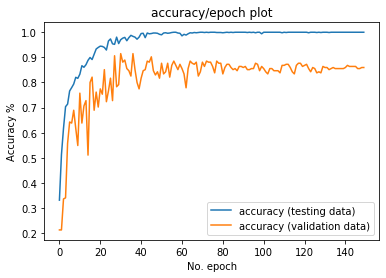

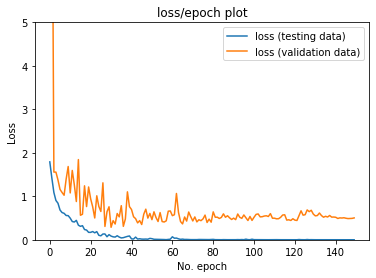

In [59]:
plt.plot(history['accuracy'], label='accuracy (testing data)')
plt.plot(history['val_accuracy'], label='accuracy (validation data)')
plt.title("accuracy/epoch plot")
plt.ylabel('Accuracy %')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()  
    
plt.plot(history['loss'], label='loss (testing data)')
plt.plot(history['val_loss'], label='loss (validation data)')
plt.title("loss/epoch plot")
plt.ylim(0, 5)
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()

### Featurewise normed

In [60]:
with open("InceptionV4_jupyter/Hist/SGD/Inception_V4_featurewise_center_and_std_150epochs.pickle", "rb") as f:
    history = pickle.load(f)

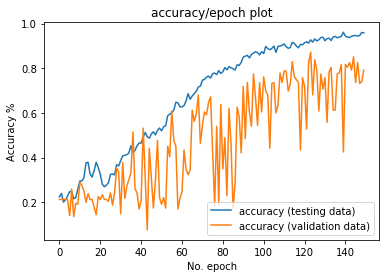

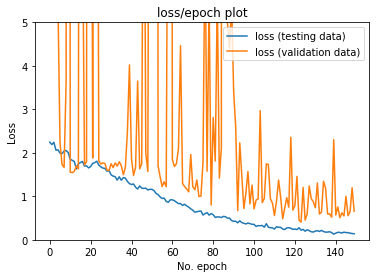

In [61]:
plt.plot(history['accuracy'], label='accuracy (testing data)')
plt.plot(history['val_accuracy'], label='accuracy (validation data)')
plt.title("accuracy/epoch plot")
plt.ylabel('Accuracy %')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()  
    
plt.plot(history['loss'], label='loss (testing data)')
plt.plot(history['val_loss'], label='loss (validation data)')
plt.title("loss/epoch plot")
plt.ylim(0, 5)
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()

### Rescaled

In [55]:
with open("InceptionV4_jupyter/Hist/SGD/Inception_V4_rescale_by_255_150epochs.pickle", "rb") as f:
    history = pickle.load(f)

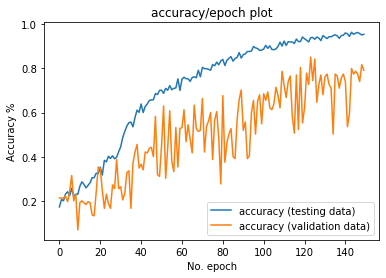

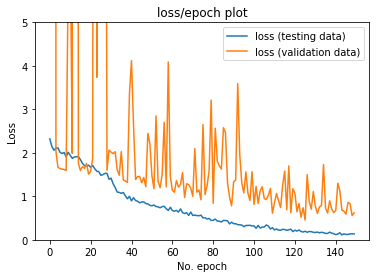

In [57]:
plt.plot(history['accuracy'], label='accuracy (testing data)')
plt.plot(history['val_accuracy'], label='accuracy (validation data)')
plt.title("accuracy/epoch plot")
plt.ylabel('Accuracy %')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()  
    
plt.plot(history['loss'], label='loss (testing data)')
plt.plot(history['val_loss'], label='loss (validation data)')
plt.title("loss/epoch plot")
plt.ylim(0, 5)
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()

# 5) Testing InceptionResNetV2

### 5.1) Loading & compiling network

In [4]:
nn1 = InceptionResNet_V2(size=(299, 299, 3), N_classes=5)

In [5]:
nn1.compile(loss=["categorical_crossentropy"], optimizer="SGD", metrics=["accuracy"])

### 3.2) Loading weights trained for 150 epochs and evaluating

Model was trained 3 times(one for each normalization type) using SGD optim. with learning rate 0.02 which was multiplied by 0.95 after each 4 epochs

### Samplewise normed

In [6]:
nn1.load_weights("InceptionResNetV2_jupyter/Weights/SGD/InceptionResNetV2_samplewise_center_and_std_150epochs_BEST.h5")

In [11]:
res1 = nn1.evaluate_generator(test_simple1)
res2 = nn1.evaluate_generator(test_hard1)

Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']


In [12]:
print("Result on simple test: Loss == {} Acc == {}".format(res1[0], res1[1]))
print("Result on hard test: Loss == {} Acc == {}".format(res2[0], res2[1]))

Result on simple test: Loss == 0.05427281452076776 Acc == 0.9921259880065918
Result on hard test: Loss == 0.19230013201013207 Acc == 0.957446813583374


### Featurewise normed

In [13]:
nn1.load_weights("InceptionResNetV2_jupyter/Weights/SGD/InceptionResNetV2_featurewise_center_and_std_150epochs_BEST.h5")

In [16]:
res1 = nn1.evaluate_generator(test_simple2)
res2 = nn1.evaluate_generator(test_hard2)

  ...
    to  
  ['...']
  ...
    to  
  ['...']


In [17]:
print("Result on simple test: Loss == {} Acc == {}".format(res1[0], res1[1]))
print("Result on hard test: Loss == {} Acc == {}".format(res2[0], res2[1]))

Result on simple test: Loss == 0.46258954278060366 Acc == 0.8188976645469666
Result on hard test: Loss == 0.4823564551770687 Acc == 0.7914893627166748


### Rescaled

In [18]:
nn1.load_weights("InceptionResNetV2_jupyter/Weights/SGD/InceptionResNetV2_rescale_by_255_150epochs_BEST.h5")

In [19]:
res1 = nn1.evaluate_generator(test_simple3)
res2 = nn1.evaluate_generator(test_hard3)

  ...
    to  
  ['...']
  ...
    to  
  ['...']


In [20]:
print("Result on simple test: Loss == {} Acc == {}".format(res1[0], res1[1]))
print("Result on hard test: Loss == {} Acc == {}".format(res2[0], res2[1]))

Result on simple test: Loss == 0.2655609335218157 Acc == 0.913385808467865
Result on hard test: Loss == 0.3506828658282757 Acc == 0.8765957355499268


# 6) Plots for InceptionResNetV2

### Samplewise normed

In [21]:
with open("InceptionResNetV2_jupyter/Hist/SGD/InceptionResNetV2_samplewise_center_and_std_150epochs.pickle", "rb") as f:
    history = pickle.load(f)

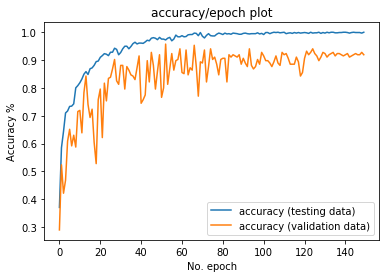

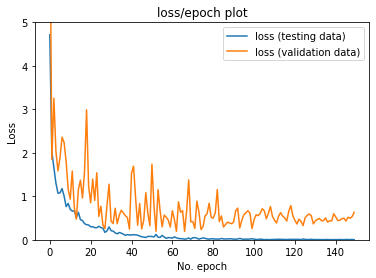

In [22]:
plt.plot(history['accuracy'], label='accuracy (testing data)')
plt.plot(history['val_accuracy'], label='accuracy (validation data)')
plt.title("accuracy/epoch plot")
plt.ylabel('Accuracy %')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()  
    
plt.plot(history['loss'], label='loss (testing data)')
plt.plot(history['val_loss'], label='loss (validation data)')
plt.title("loss/epoch plot")
plt.ylim(0, 5)
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()

### Featurewise normed

In [23]:
with open("InceptionResNetV2_jupyter/Hist/SGD/InceptionResNetV2_featurewise_center_and_std_150epochs.pickle", "rb") as f:
    history = pickle.load(f)

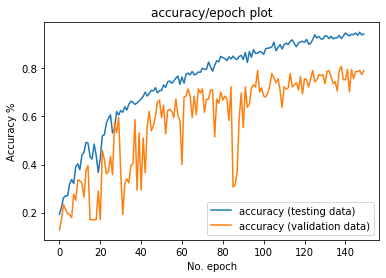

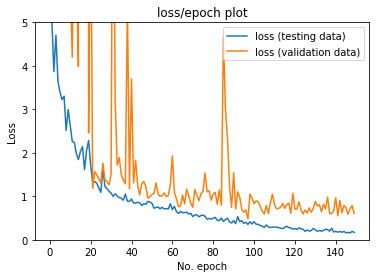

In [24]:
plt.plot(history['accuracy'], label='accuracy (testing data)')
plt.plot(history['val_accuracy'], label='accuracy (validation data)')
plt.title("accuracy/epoch plot")
plt.ylabel('Accuracy %')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()  
    
plt.plot(history['loss'], label='loss (testing data)')
plt.plot(history['val_loss'], label='loss (validation data)')
plt.title("loss/epoch plot")
plt.ylim(0, 5)
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()

### Rescaled

In [25]:
with open("InceptionResNetV2_jupyter/Hist/SGD/InceptionResNetV2_rescale_by_255_150epochs.pickle", "rb") as f:
    history = pickle.load(f)

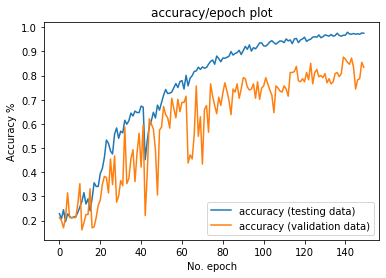

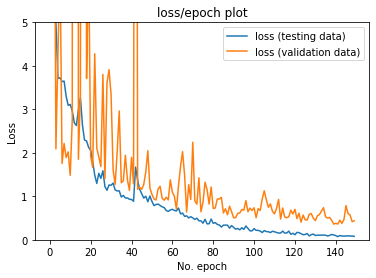

In [26]:
plt.plot(history['accuracy'], label='accuracy (testing data)')
plt.plot(history['val_accuracy'], label='accuracy (validation data)')
plt.title("accuracy/epoch plot")
plt.ylabel('Accuracy %')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()  
    
plt.plot(history['loss'], label='loss (testing data)')
plt.plot(history['val_loss'], label='loss (validation data)')
plt.title("loss/epoch plot")
plt.ylim(0, 5)
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()

# 7) Summary

I've also tested bunch of other architectures like ResNet152, InceptionV3, GoogLeNet, but they were not even close as effective as InceptionV4 or InceptionResNetV2(which showed amazing performance)

Samplewise normalization and centering showed up to be the most effective way to preprocess this dataset

Best result on easy test showed InceptionResnetV2 with more than 99% of correct predictions

Best result on hard test was shown by my own model, which is sadly 2.5 times slower to train(in comparisson to InceptionResNetV2), the result was 96.2% of correct predictions with loss approx 0.17, when best result for InceptionResNetV2 was 95.7% with loss 0.19

Probably after some parameter tuning and some modifications i will add it to this notebook, cause now it's doing poorly on easy test set with only 97.1% of correct preds, and loss not even close as good as InceptionResNetV2, when the best score of InceptionResNetV2 is 99% (loss ~= 0.05)